In [1]:
import csv
import json
import sys, pymysql
import pandas as pd

#與MySQL建立連線
conn = pymysql.connect(host='localhost',port=3306,user='root',password='123456',db='pm25')
cursor = conn.cursor()
try:
    sql_str="select * from pm25_2019"
    cursor.execute(sql_str)
    result = cursor.fetchall()
    l = len(result)
    list_data = []
    for i in range(5):
        for row in result:
            list_row = list(row)
            list_data.append(list_row)
except:
    print('unable to fetch data from db')

cursor.close()
conn.close() 

df = pd.DataFrame(list_data,columns=['timestamp','date','time','device_id','Temperature','Humidity','PM25'])
df['PM25'] = df['PM25'].astype(int)
df['Temperature'] = df['Temperature'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df["hour"] = df['time'].astype(str).str.split(':',expand = True)[0].str.split(' ',expand = True)[2].astype(int)
#print(list_data)

data = pd.DataFrame(df,columns=['hour', 'Temperature', 'Humidity', 'PM25'])
data

,hour,Temperature,Humidity,PM25
0,9,24.74,65.89,17
1,10,24.66,66.01,14
2,11,24.62,64.62,12
3,12,24.27,64.53,9
4,13,24.11,65.08,11
5,14,24.01,65.89,12
6,15,24.00,67.02,13
7,16,23.97,67.13,15
8,17,23.99,67.83,12
9,18,23.91,68.99,16


In [12]:
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

In [2]:
#線性SVM
#%matplotlib inline
import numpy as np
#import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X_train = data.iloc[:5000,0:3]
y_train = data.iloc[:5000,3]
X_test = data.iloc[5000:5355,0:3]
y_test = data.iloc[5000:5355,3]

clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.1038; test score: 0.08732394366197183


In [3]:
#線性SVM
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression

X_train = data.iloc[:5000,0:3]
y_train = data.iloc[:5000,3]
X_test = data.iloc[5000:5355,0:3]
y_test = data.iloc[5000:5355,3]

regr = LinearSVR()
regr.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


train score: 0.1038; test score: 0.08732394366197183


In [26]:
#高斯SVM
from sklearn.svm import SVR
import numpy as np
X_train = data.iloc[:5000,0:3]
y_train = data.iloc[:5000,3]
X_test = data.iloc[5000:5355,0:3]
y_test = data.iloc[5000:5355,3]
clf = SVR(C=1.0, kernel='rbf', gamma=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.45134058463927806; test score: 0.31506283059267104


In [6]:
#儲存模型
from sklearn.externals import joblib
joblib.dump(clf,"./SVR_Gaussian_Kernel.pkl")

['./SVR_Gaussian_Kernel.pkl']

In [24]:
import pandas as pd # 引用套件並縮寫為 pd  
df = pd.read_csv('E:/PM2.5/IOT/df.csv')
X_test = df[['hour', 'Temperature', 'Humidity']]
y_test = np.array(df['PM25']).astype(float)
y_test

array([12., 12., 16., 11., 20.,  9.,  9.,  8., 14., 21., 18., 19., 23.,
       32., 38., 34., 40., 38., 39., 45., 47., 42., 41., 32., 28., 21.,
       20., 17., 20., 23., 19., 18., 21., 38., 27., 12., 28., 14., 12.,
       14., 18., 15., 20., 32., 32., 36., 39., 43., 40., 52., 47., 44.,
       51., 49., 51., 48., 45., 45.])

In [25]:
#SVR(高斯)
SVR_Gaussian_Kernel = joblib.load('./SVR_Gaussian_Kernel.pkl')
SVR_Gaussian_Kernel_pred = SVR_Gaussian_Kernel.predict(X_test)

#模型評分
import numpy as np
from statistics import mean 

def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("SVR(高斯) :",mean_absolute_percentage_error(y_test, SVR_Gaussian_Kernel_pred))

SVR(高斯) : 47.29862711844128


In [28]:

mean_absolute_percentage_error(y_test, rr.predict(X_test))

NameError: name 'rr' is not defined

In [3]:
#自動選擇參數
from sklearn.svm import SVR
from common.utils import plot_param_curve
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0, 100, 101)
param_grid = {'gamma':gammas}
clf = GridSearchCV(SVR(), param_grid, cv=5)
clf.fit(X_train, y_train)

print("best param: {0}\nbest score: {1}".format(clf.best_params_, clf.best_score_))

#plt.figure(figsize=(10,4), dpi=144)
#plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma');

best param: {'gamma': 1.0}
best score: 0.37343664162218454


elaspe : 41.495418


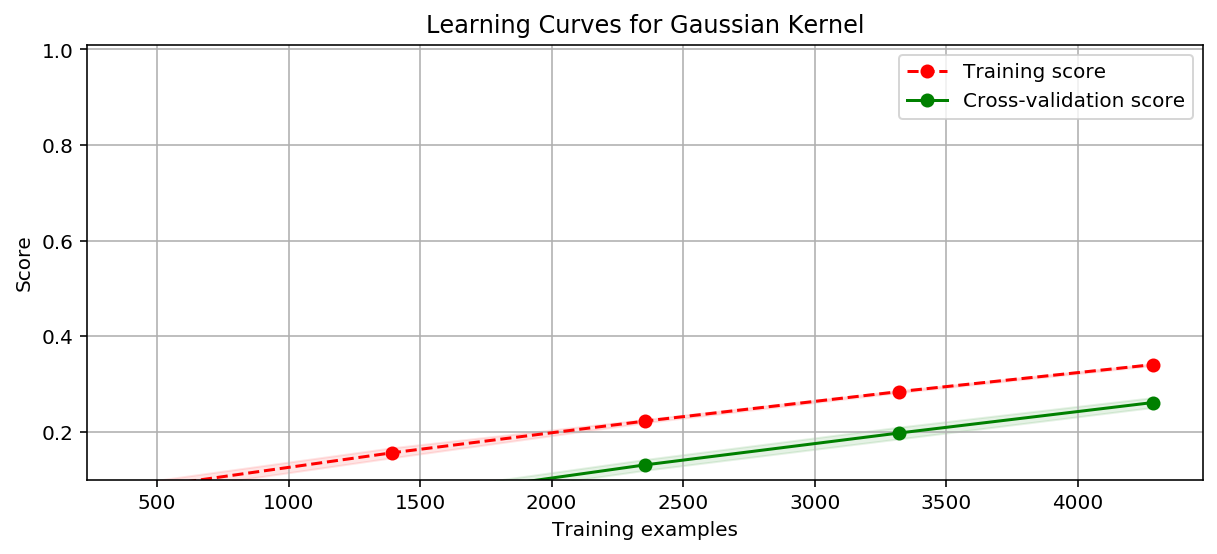

In [32]:
#畫出學習曲線
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
X = data.iloc[:,0:3]
y = data.iloc[:,3]
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

start = time.perf_counter()

plt.figure(figsize=(10,4), dpi=144)

plot_learning_curve(plt, SVR(C=1.0, kernel='rbf', gamma=100),title, X, y, ylim=(0.1,1.01), cv=cv)

print('elaspe : {0:.6f}'.format(time.perf_counter()-start))

In [ ]:
#二階SVM
from sklearn.svm import SVR

X_train = data.iloc[:5000,0:3]
y_train = data.iloc[:5000,3]
X_test = data.iloc[5000:5355,0:3]
y_test = data.iloc[5000:5355,3]

clf = SVR(C=1.0, kernel='poly', degree=10)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

In [ ]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [9, 10]

start = time.perf_counter()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, SVR(C=1.0, kernel='poly', degree=degrees[i]),
                        title.format(degrees[i]), X, y, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

print('elaspe: {0:.6f}'.format(time.perf_counter()-start))